In [19]:
# count plot examples 
# colors - https://coolors.co/

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = sns.load_dataset('mpg')

In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [14]:
grouped = df.groupby('origin')['horsepower'].agg(['mean','max','min'])
print(grouped)

              mean    max   min
origin                         
europe   80.558824  133.0  46.0
japan    79.835443  132.0  52.0
usa     119.048980  230.0  52.0


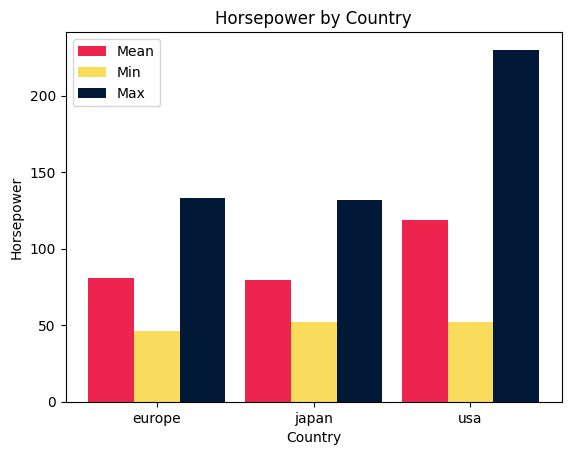

In [24]:
# basic bar plot

bar_width = 0.35
spacing = 0.2  # Extra space between categories
index = np.arange(len(grouped)) * (1 + spacing)

plt.bar(x=index, height=grouped['mean'], width=bar_width, color='#ED254E', label='Mean')
plt.bar(x=index+bar_width*1, height=grouped['min'], width=bar_width, color='#F9DC5C', label='Min')
plt.bar(x=index+bar_width*2, height=grouped['max'], width=bar_width, color='#011936', label='Max')

plt.xlabel('Country')
plt.ylabel('Horsepower')
plt.title('Horsepower by Country')
plt.xticks(index + bar_width, grouped.index)
plt.legend()

plt.show()

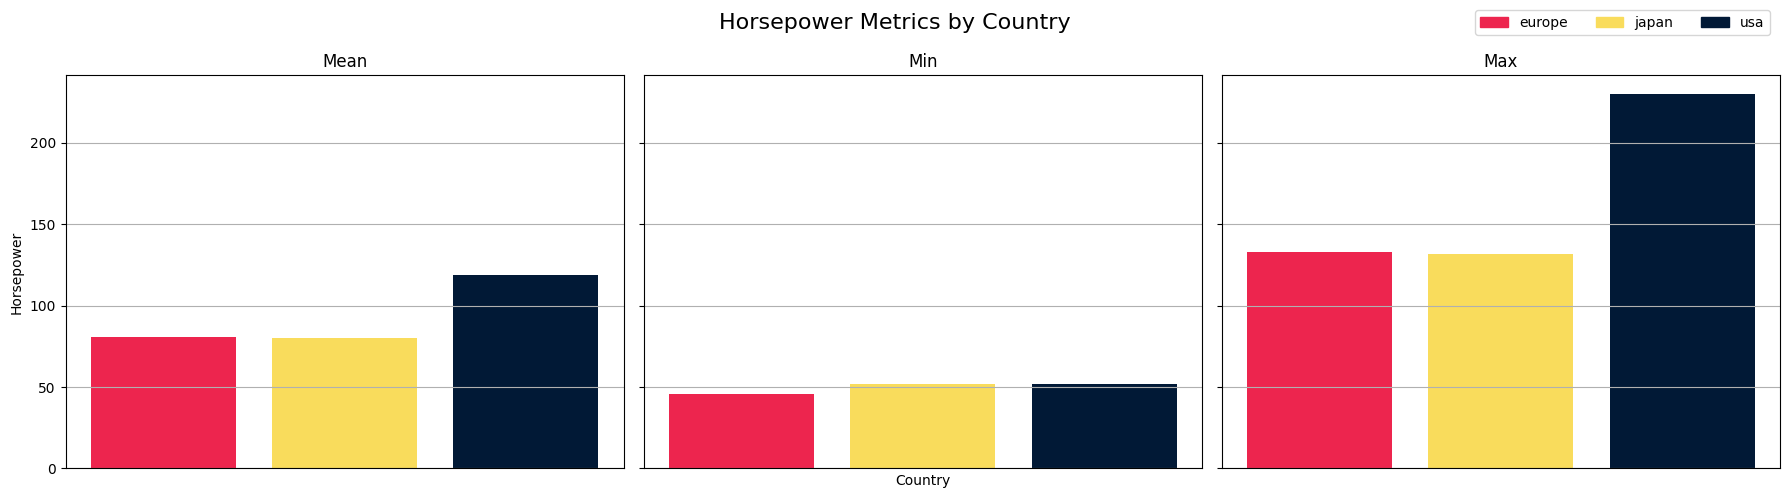

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

colors = ['#ED254E','#F9DC5C','#011936']

axes[0].bar(grouped.index, grouped['mean'], color=colors)
axes[0].set_title('Mean')
axes[0].set_ylabel('Horsepower')

axes[1].bar(grouped.index, grouped['min'], color=colors)
axes[1].set_title('Min')
axes[1].set_xlabel('Country')

axes[2].bar(grouped.index, grouped['max'], color=colors)
axes[2].set_title('Max')

# Hide the x-tick labels for all subplots
for ax in axes:
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.grid(axis='y')

fig.suptitle('Horsepower Metrics by Country', fontsize=16)

handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(grouped.index))]
fig.legend(handles, grouped.index, loc='upper right', ncol=3, bbox_to_anchor=(0.99, 1))

#fig.legend(['Mean', 'Min', 'Max'], loc='upper right', ncol=3, bbox_to_anchor=(0.95, 0.99))
plt.tight_layout()
plt.show()